In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv("diamonds.csv")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


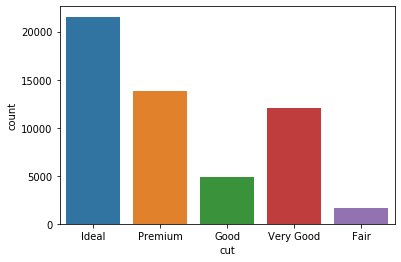

In [6]:
sb.countplot(data=df,x="cut");

In [7]:
freq=df.cut.value_counts()

In [8]:
order=freq.index

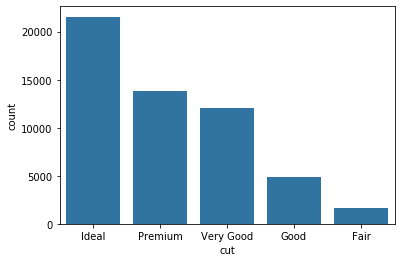

In [9]:
sb.countplot(data=df,x="cut",order=order,color=sb.color_palette()[0]);

In [10]:
df.clarity

0        SI2
1        SI1
2        VS1
3        VS2
4        SI2
        ... 
53935    SI1
53936    SI1
53937    SI1
53938    SI2
53939    SI2
Name: clarity, Length: 53940, dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

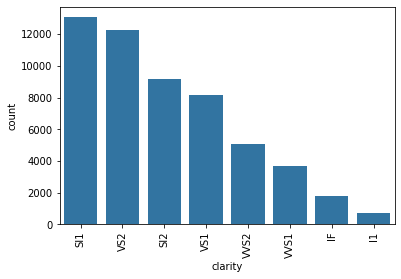

In [11]:
clarity_order = df.clarity.value_counts().index
sb.countplot(data=df, x=df.clarity,color=sb.color_palette()[0],order=clarity_order)
plt.xticks(rotation=90)

In [12]:
# Returns the sum of all not-null values in `clarity` column
n_clarity = df['clarity'].value_counts().sum()

# Return the highest frequency in the `clarity` column
max_clarity_count = df['clarity'].value_counts()[0]
# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_clarity_count / n_clarity
print(max_prop)

0.2422135706340378


In [13]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24])

In [14]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00',
 '0.02',
 '0.04',
 '0.06',
 '0.08',
 '0.10',
 '0.12',
 '0.14',
 '0.16',
 '0.18',
 '0.20',
 '0.22',
 '0.24']

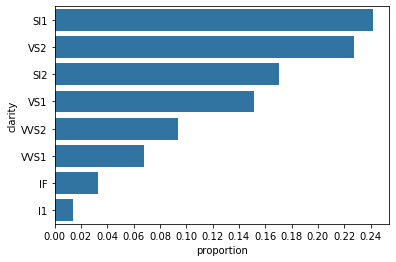

In [15]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='clarity', color=base_color, order=clarity_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_clarity,tick_names)
plt.xlabel('proportion');

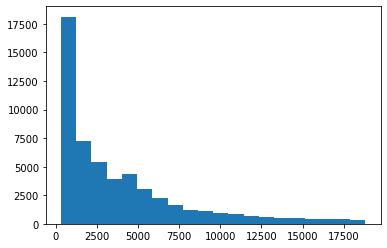

In [16]:

plt.hist(data = df, x = 'price', bins = 20);

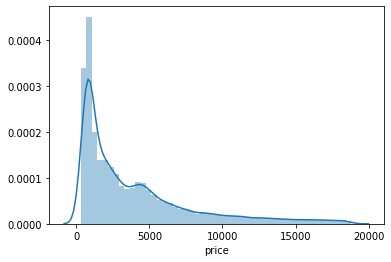

In [17]:
sb.distplot(df['price'])


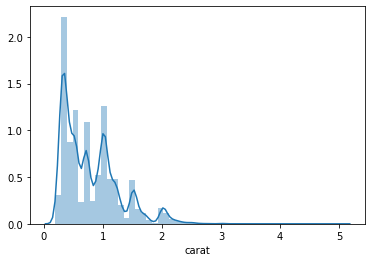

In [18]:
sb.distplot(df['carat'])


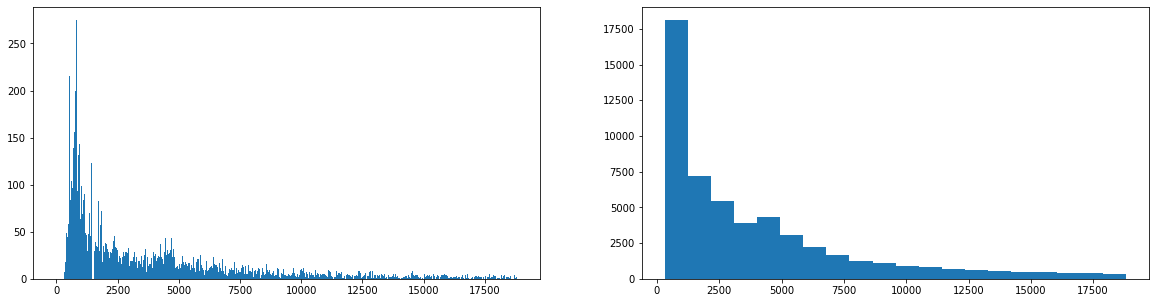

In [19]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, df['price'].max()+5, 5)
plt.hist(data = df, x = 'price', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
plt.hist(data = df, x = 'price', bins = 20);

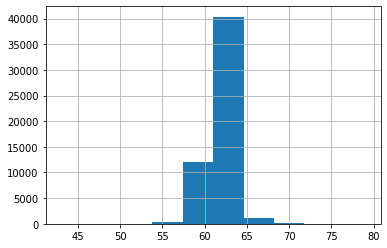

In [20]:
#bins=np.arange(0,df.depth.max()+5,50)
df.depth.hist()

In [21]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


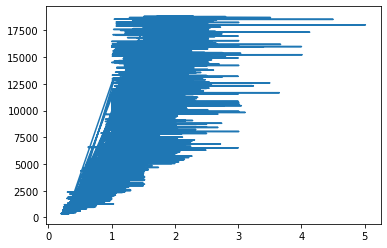

In [22]:
plt.plot(df.carat,df.price)

In [23]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0, 5+0.2, 0.1)
bin_centers = bin_edges[:-1] + 1

# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(df['carat'], bin_edges, include_lowest = True)
displ_binned

0        (0.2, 0.3]
1        (0.2, 0.3]
2        (0.2, 0.3]
3        (0.2, 0.3]
4        (0.3, 0.4]
            ...    
53935    (0.7, 0.8]
53936    (0.7, 0.8]
53937    (0.6, 0.7]
53938    (0.8, 0.9]
53939    (0.7, 0.8]
Name: carat, Length: 53940, dtype: category
Categories (51, interval[float64]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (4.7, 4.8] < (4.8, 4.9] < (4.9, 5.0] < (5.0, 5.1]]

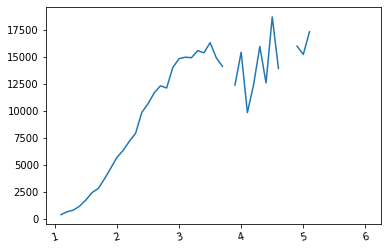

In [24]:
# For the points in each bin, we compute the mean and standard error of the mean.
price_mean = df['price'].groupby(displ_binned).mean()
price_std = df['price'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=price_mean)
plt.xticks(rotation=15);


Text(0, 0.5, 'price')

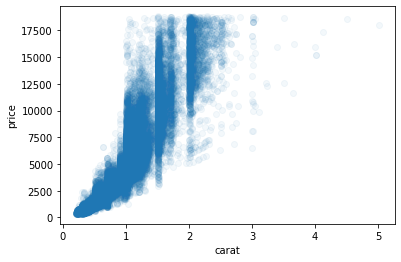

In [25]:
plt.scatter(data = df, x = 'carat', y = 'price',alpha=0.05);
plt.xlabel('carat')
plt.ylabel('price')

NameError: name 'cuberoot_trans' is not defined

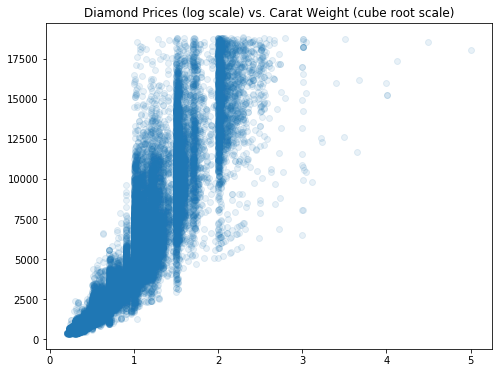

In [26]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'carat', y = 'price', alpha = 1/10)

plt.title('Diamond Prices (log scale) vs. Carat Weight (cube root scale)')

carat_ticks = [0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 3]
plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks)
plt.xlim([cuberoot_trans(.18), cuberoot_trans(3.5)])
plt.xlabel('Carat')

plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Price ($)')

plt.show()

Text(0.5, 1.0, 'carat vs price')

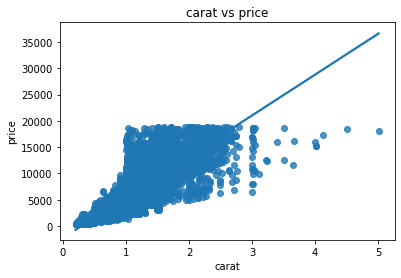

In [27]:
sb.regplot(x="carat", y="price",data=df);
plt.xlabel('carat');
plt.ylabel('price');
plt.title("carat vs price")

Text(0.5, 1, 'carat vs price')

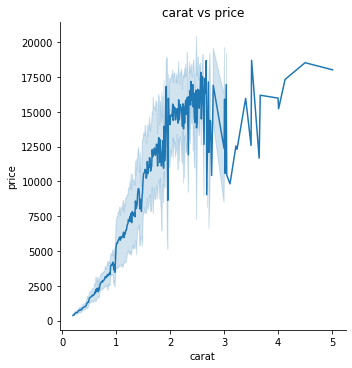

In [28]:
sb.relplot(x="carat", y="price",kind='line',ci="sd" ,data=df);
plt.xlabel('carat');
plt.ylabel('price');
plt.title("carat vs price")

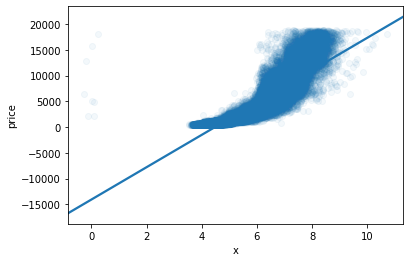

In [29]:
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sb.regplot(data = df, x = 'x', y = 'price', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
#plt.scatter(data = df, x = 'x', y = 'price', alpha=1/20);

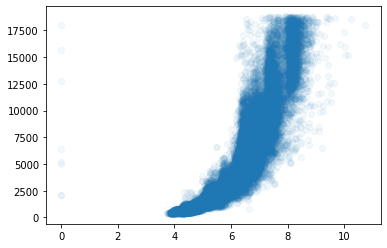

In [30]:
plt.scatter(data = df, x = 'x', y = 'price', alpha=1/20);

Text(0, 0.5, 'price')

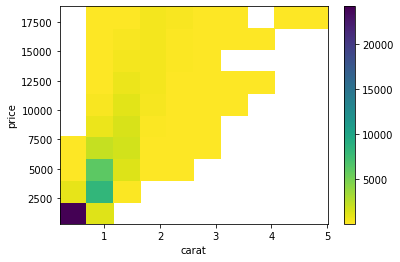

In [31]:
plt.hist2d(data = df, x = 'carat', y = 'price',cmin=0.5, cmap='viridis_r');
plt.colorbar()
plt.xlabel('carat')
plt.ylabel('price')

Text(0, 0.5, 'price')

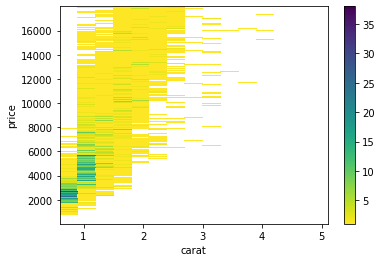

In [32]:
bins_x = np.arange(0.6, 5+0.3, 0.3)
bins_y = np.arange(12, 17500+500, 3)
plt.hist2d(data = df, x = 'carat', y = 'price',cmin=0.5, cmap='viridis_r',bins=[bins_x, bins_y]);
plt.colorbar()
plt.xlabel('carat')
plt.ylabel('price')

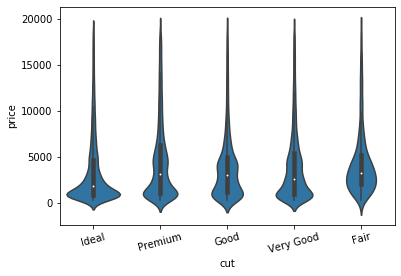

In [33]:
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.violinplot(data=df, x='cut', y='price', color=base_color, innner=None)
plt.xticks(rotation=15);

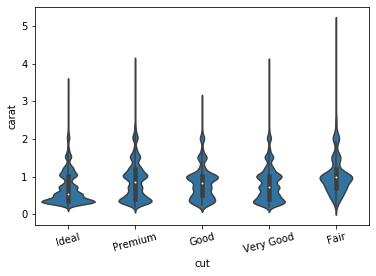

In [34]:
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.violinplot(data=df, x='cut', y='carat', color=base_color, innner=None)
plt.xticks(rotation=15);

In [35]:
ct_counts = df.groupby(['cut', 'clarity']).size()


In [36]:
ct_counts = ct_counts.reset_index(name='count')

In [37]:
ct_counts = ct_counts.pivot(index = 'cut', columns = 'clarity', values = 'count')

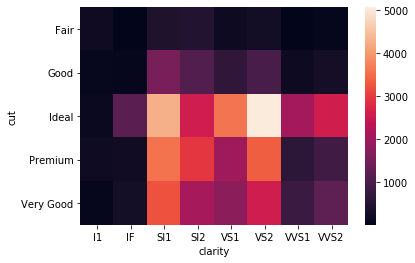

In [38]:
sb.heatmap(ct_counts)


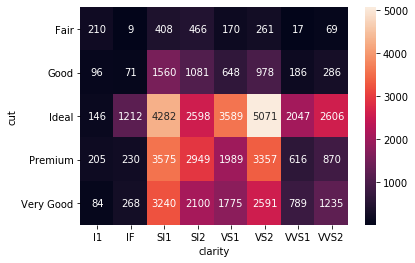

In [39]:
sb.heatmap(ct_counts, annot = True, fmt = 'd')


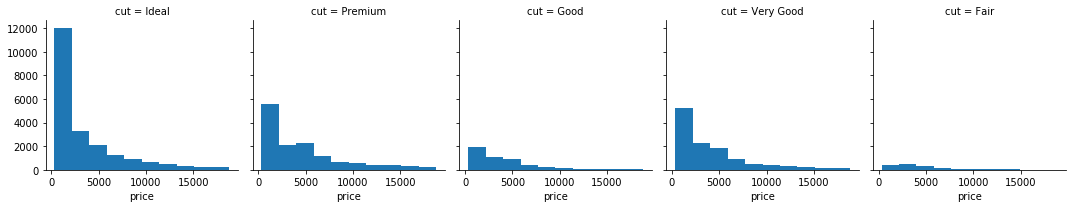

In [40]:

# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'cut')
g.map(plt.hist, "price")

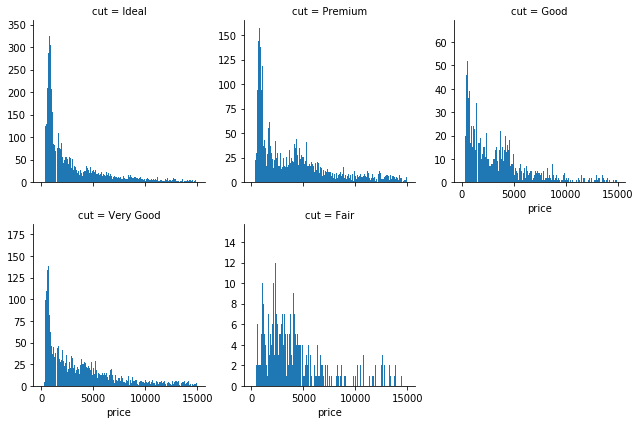

In [41]:
bin_edges = np.arange(0, 15000, 20)

# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'cut', col_wrap=3, sharey=False)
g.map(plt.hist, "price",bins = bin_edges)

Text(0, 0.5, 'price')

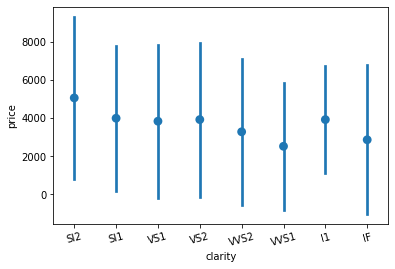

In [42]:
sb.pointplot(data=df, x='clarity', y='price', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=15);
plt.ylabel('price')

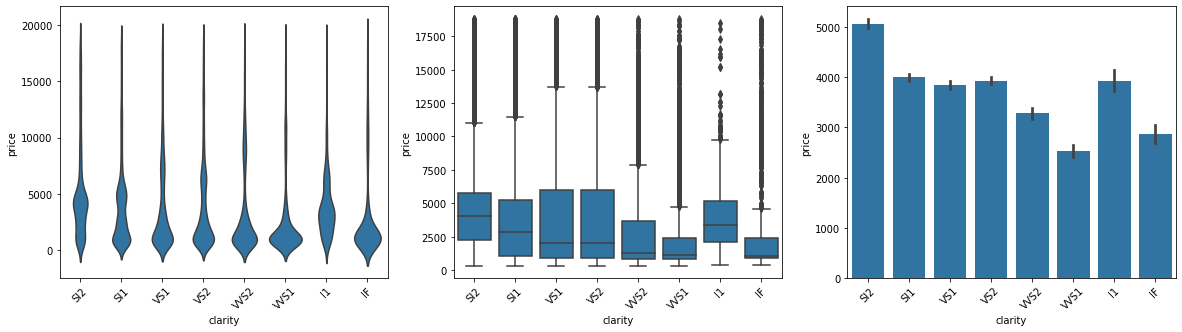

In [43]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=df, x='clarity', y='price', inner = None,
              color = base_color)
plt.xticks(rotation = 45); # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=df, x='clarity', y='price', color = base_color)
plt.xticks(rotation = 45);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=df, x='clarity', y='price', color = base_color)
plt.xticks(rotation = 45);

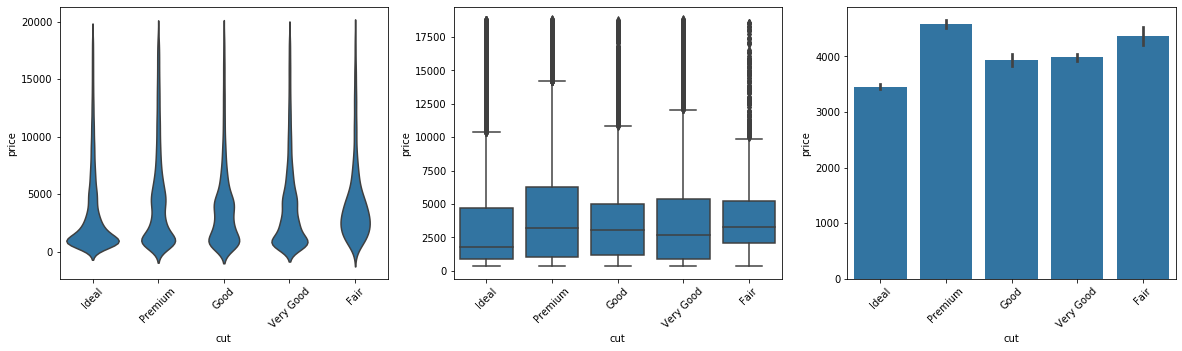

In [44]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=df, x='cut', y='price', inner = None,
              color = base_color)
plt.xticks(rotation = 45); # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=df, x='cut', y='price', color = base_color)
plt.xticks(rotation = 45);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=df, x='cut', y='price', color = base_color)
plt.xticks(rotation = 45);

C:\Users\saara\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(33.756611689814804, 0.5, 'price')

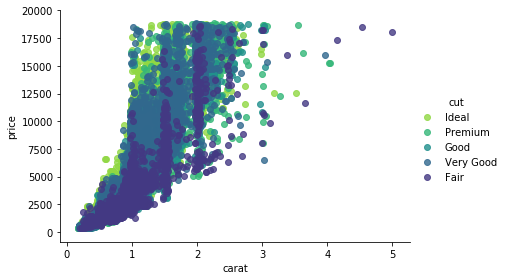

In [45]:
g = sb.FacetGrid(data = df, hue = 'cut', size = 4,aspect=1.5,palette='viridis_r')
g.map(sb.regplot, 'carat', 'price',x_jitter=0.04,fit_reg=False)
g.add_legend()
plt.xlabel("carat")
plt.ylabel("price")

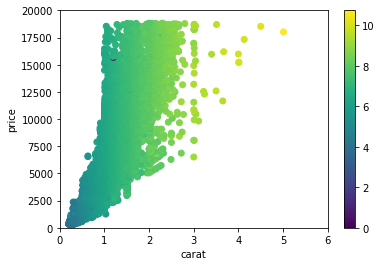

In [46]:
plt.scatter(data=df, x='carat', y='price', c='x')
plt.xlabel('carat')
plt.ylabel('price')
plt.xlim((0,6))
plt.ylim((0,20000))
plt.colorbar();

In [47]:
g = sb.FacetGrid(data = df, col = 'carat', size = 4)
g.map(sb.boxplot, 'price', 'cut')

ValueError: Image size of 78624x288 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 78624x288 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 78624x288 with 273 Axes>

[]

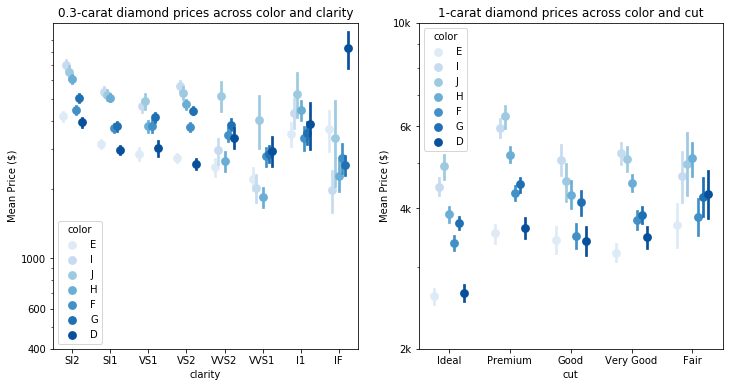

In [48]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])

sb.pointplot(data = df, x = 'clarity', y = 'price', hue = 'color',
             palette = 'Blues', linestyles = '', dodge = 0.5, ax = ax[0])
ax[0].set_title('0.3-carat diamond prices across color and clarity')
ax[0].set_ylabel('Mean Price ($)')
ax[0].set_yscale('log')
ax[0].set_yticks([400, 600, 1000])
ax[0].set_yticklabels(['400', '600', '1000'])
ax[0].set_yticklabels([],minor = True)

sb.pointplot(data = df, x = 'cut', y = 'price', hue = 'color',
             palette = 'Blues', linestyles = '', dodge = 0.5, ax = ax[1])
ax[1].set_title('1-carat diamond prices across color and cut')
ax[1].set_ylabel('Mean Price ($)')
ax[1].set_yscale('log')
ax[1].set_yticks([2e3, 4e3, 6e3, 1e4])
ax[1].set_yticklabels(['2k', '4k', '6k', '10k'])
ax[1].set_yticklabels([],minor = True)